<a href="https://colab.research.google.com/github/snehachavhan2004/CODSOFT/blob/main/TITANIC_SURVIVAL_PREDICTION%20(Task%201).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries for Data Analysis and Visualization

In [ ]:
import pickle  # For saving and loading machine learning models
import pandas as pd  # For creating tables, data manipulation and analysis
import numpy as np  # For numerical operations
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations

In [ ]:
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler  # For standardizing features
from sklearn.linear_model import LogisticRegression  # For logistic regression model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,  ConfusionMatrixDisplay  # For evaluating the model

# Loading the data

In [ ]:
# Load the dataset
df = pd.read_csv('/content/Titanic-Dataset.csv', encoding='latin-1')

# Explore the Data

In [ ]:
df.head()  # Display the first few rows of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()  # Get information about the dataset, including data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()  # Generate descriptive statistics of the dataset

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# number of rows and columns
df.shape

(891, 12)

In [ ]:
# number of missing values in each column
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


# Handling the missing values

In [ ]:
df['Cabin'].fillna(' unknown', inplace=True)

In [ ]:
# Convert 'sex' column to numeric (0 for male, 1 for female)
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

In [ ]:
# Convert 'age' column to numeric and fill missing values with the mean age
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['age'] = df['age'].fillna(df['age'].mean(), inplace=True)

In [ ]:
# drop the unnecessay column
df= df.drop(['embarked'], axis=1)

In [ ]:
# Clean up column names (make them lowercase and remove any extra spaces)
df = df.rename(columns=lambda x: x.strip().lower())

In [ ]:
# Select relevant features
df = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'survived']]

In [ ]:
# Separate features (X) and target variable (y)
X = df.drop(['survived'], axis=1)
y = df['survived']

# Visualize the Data
1. Bar plot of Survival Rate by Gender

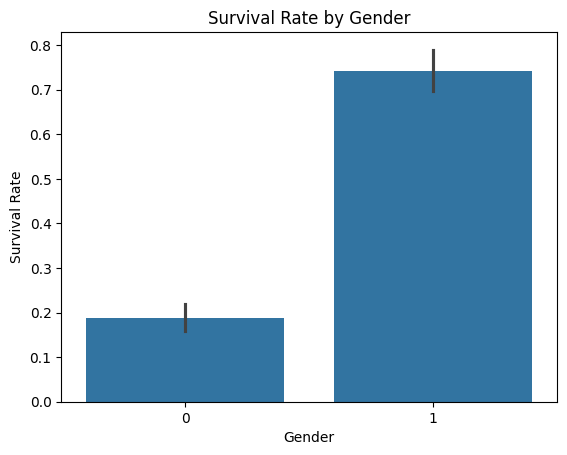

In [ ]:
sns.barplot(data=df, x='sex', y='survived')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

2. Pie chart Survival Status

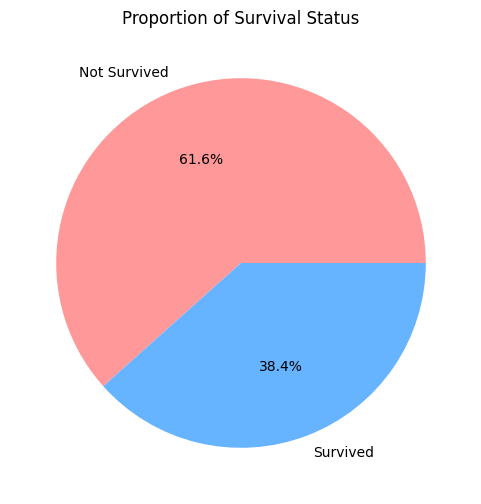

In [ ]:
# Calculate the counts for each survival status
survival_counts = df['survived'].value_counts()

# Define labels for the pie chart
labels = ['Not Survived', 'Survived']

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(survival_counts, labels=labels, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Proportion of Survival Status')
plt.show()

3. Histogram of fare distribution

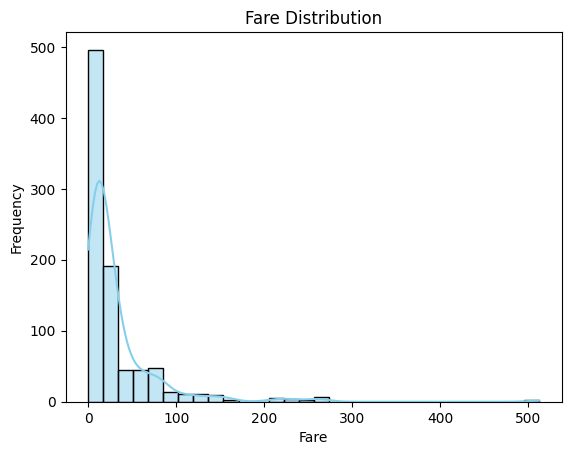

In [ ]:
sns.histplot(df['fare'], bins=30, kde=True, color='skyblue')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# Prepare for Modeling

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scaler features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Choose a Model

In [ ]:
# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
#make prediction
y_pred = model.predict(X_test_scaled)

In [ ]:
# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.7988826815642458
Confusion Matrix:
 [[90 15]
 [21 53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



# 1. Train and Save the Model
After training your model, you can save it to a file using pickle. This allows you to reload the model later without needing to retrain it.

In [ ]:
import pickle

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Save the trained model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 2. Load the Model and Make Predictions
When you need to use the model again, you can load it from the file and then use it to make predictions.

In [ ]:
# Load the model from the file
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Use the loaded model to make predictions
y_pred_loaded = loaded_model.predict(X_test)

# 3. Evaluate the Loaded Model
You can then evaluate the performance of the loaded model in the same way you did with the original model.

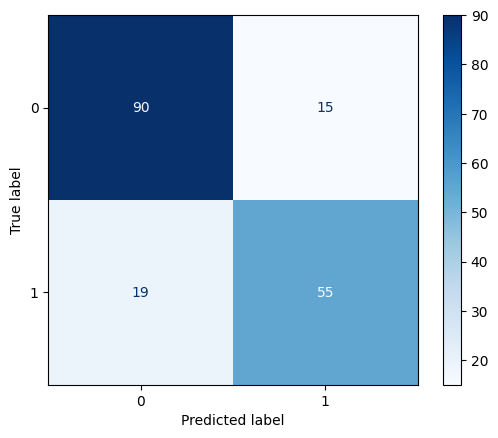

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Compute the confusion matrix for the loaded model
cm_loaded = confusion_matrix(y_test, y_pred_loaded)

# Create a ConfusionMatrixDisplay object
disp_loaded = ConfusionMatrixDisplay(confusion_matrix=cm_loaded, display_labels=loaded_model.classes_)

# Plot the confusion matrix
disp_loaded.plot(cmap=plt.cm.Blues)
plt.show()